# **Regressão Logística**

Conforme falamos na última aula, a regressão logística é um modelo linear que pode utilizar as características de entrada ($X$) e estimar a *probabilidade* daquele conjunto de características pertecer a cada uma das classes.

Vamos lembrar da equação que define a regressão logística:

$$p(Y=1|X) = \frac{e^{a_0+\sum_{i=1}^{m}a_ix_i}}{1+e^{a_0+\sum_{i=1}^{m}a_ix_i}}$$

Na equação acima:

- $a_0$ - é conhecido como *intercepto* e representa o valor da probabilidade daquele conjunto de características pertencer à classe 1, quando todos os outros valores $x_i = 0$. Pode ou não ter significado físico.
- $x_i$ são os valores das características que queremos modelar.
- $a_i$ são as *inclinações* ou *coeficientes angulares*. Representam o efeito médio que cada variável $x_i$ tem sobre a probabilidade. Voltaremos a eles posteriormente.

O termo $a_0 + \sum_{i=1}^{m} a_i x_i$ determina a reta ou o hiperplano que vai separar as classes.

Nativamente, a regressão logística funciona para classificação de problemas binários (0 / 1). Porém, com algumas modificações (que falaremos lá em redes neurais), ela pode ser adaptada para problemas multi-classes.

Vamos começar a resolver nosso problema de crédito bancário (Fonte: https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv)

In [42]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

#ignorar os warnings (opcional)
warnings.filterwarnings('ignore')

In [2]:
# conectar o colab ao drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ALGORITMOS DE IA/DATASET/german.csv', sep=';')
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
#analisar tipagem dos dados - dados nullos forma 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [5]:
# analisar dados nullos - forma 2
data.isna().sum()

,0
Creditability,0
Account_Balance,0
Duration_of_Credit_monthly,0
Payment_Status_of_Previous_Credit,0
Purpose,0
Credit_Amount,0
Value_Savings_Stocks,0
Length_of_current_employment,0
Instalment_per_cent,0
Sex_Marital_Status,0


<Axes: >

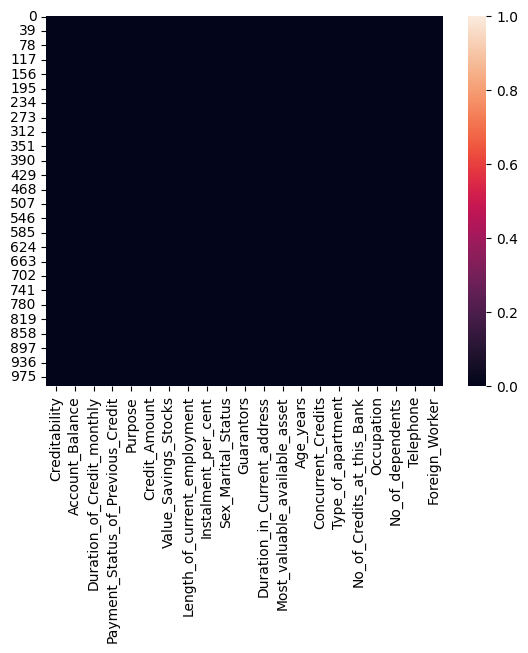

In [6]:
# analise de dados nullos - forma 3
sns.heatmap(data.isna(), vmin=0, vmax=1)

In [7]:
# adicionar coluna nula
data['test'] = np.nan

<Axes: >

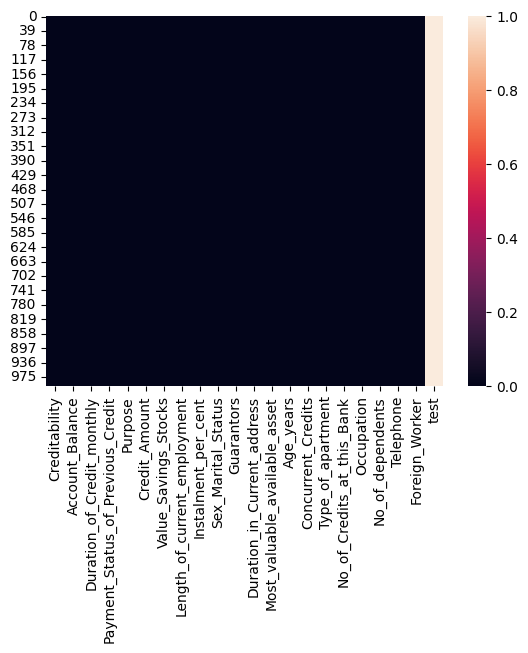

In [8]:
# analise de dados nullos - forma 3
sns.heatmap(data.isna(), vmin=0, vmax=1)

In [22]:
# eliminando a coluna teste
data.drop(columns=['test'], inplace=True)
#data = data.drop(columns=['test'])

In [10]:
# (opcional) modificar os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ','_').str.replace('()','').str.replace(')','')

In [13]:
# verificar o balanceamento das classes
proportions = data['creditability'].value_counts(normalize=True)

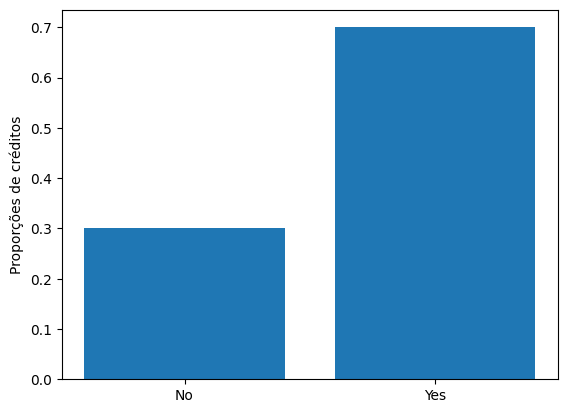

In [15]:
# outra forma de ver o balanceamento de classes
plt.bar(x=proportions.index, height=proportions.values)
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.ylabel('Proporções de créditos')
plt.show()

In [18]:
data = data[['creditability', 'credit_amount', 'age_years', 'duration_of_credit_monthly',
             'concurrent_credits', 'length_of_current_employment', 'no_of_dependents']]
data.head()

,creditability,credit_amount,age_years,duration_of_credit_monthly,concurrent_credits,length_of_current_employment,no_of_dependents
0,1,1049,21,18,3,2,1
1,1,2799,36,9,3,3,2
2,1,841,23,12,3,4,1
3,1,2122,39,12,3,3,2
4,1,2171,38,12,1,3,1


In [19]:
# verificação info dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   creditability                 1000 non-null   int64
 1   credit_amount                 1000 non-null   int64
 2   age_years                     1000 non-null   int64
 3   duration_of_credit_monthly    1000 non-null   int64
 4   concurrent_credits            1000 non-null   int64
 5   length_of_current_employment  1000 non-null   int64
 6   no_of_dependents              1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [20]:
# outra forma de verificar o tamanho dos dados
data.shape

(1000, 7)

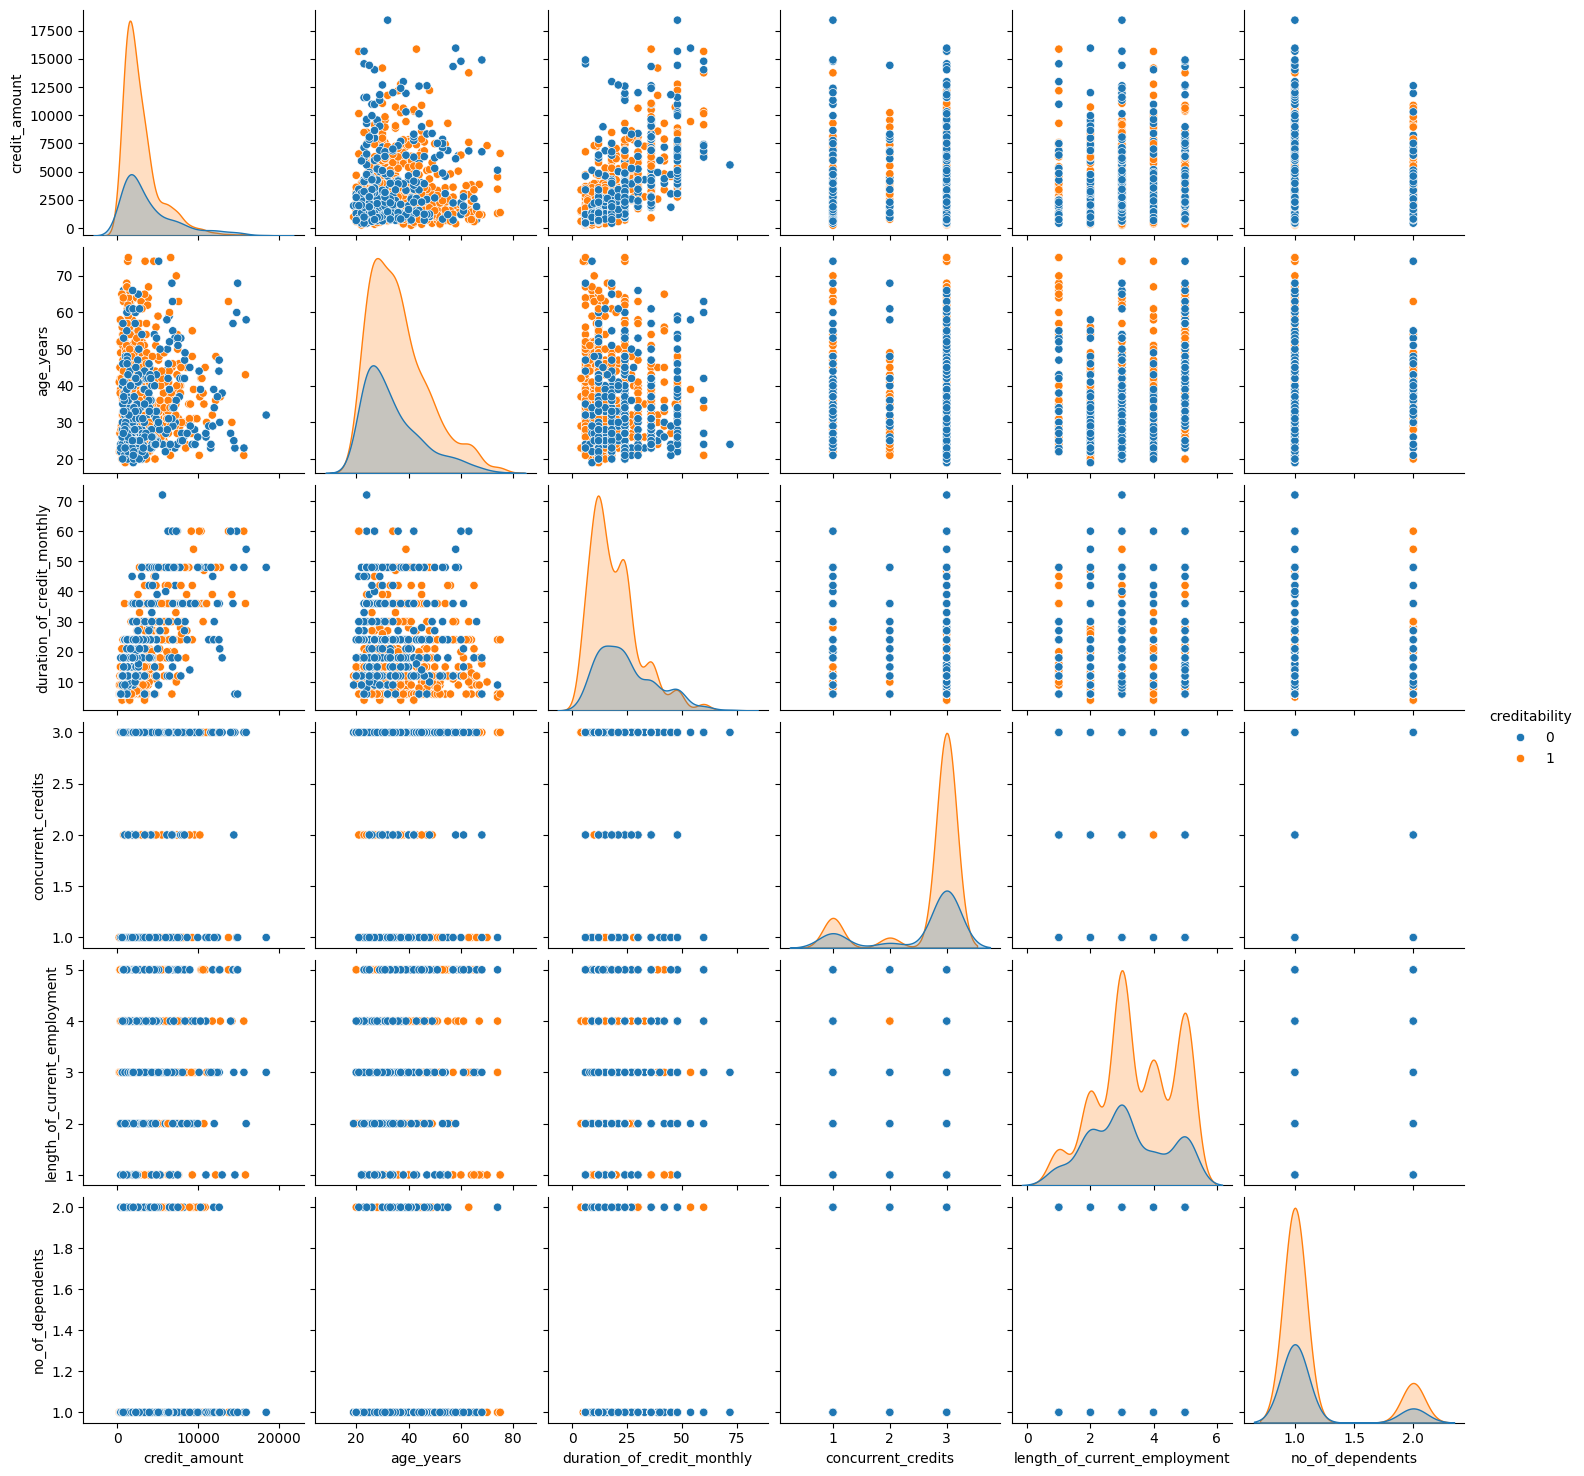

In [21]:
# analise de separabilidade linear (visual)
sns.pairplot(data, hue='creditability')

In [30]:
# separando x e y
x = data.drop(columns=['creditability'])
y = data[['creditability']]

In [37]:
#separacao treino e teste (stratify mantem as proporcoes originais)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [41]:
props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,original,train,test
0,0.7,0.7,0.7
1,0.3,0.3,0.3


In [44]:
# criar um modelo baseline - hipotese: todos merecem credito (todos = 1)
y_base = np.repeat(1, repeats=y_test.shape[0])
y_base

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
# metricas do baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       210

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



In [46]:
# criar um primeiro modelo de regressão logistica
rl1 = LogisticRegression(penalty=None).fit(x_train, y_train)

#fazendo previsao do teste
yhat_rl1 = rl1.predict(x_test)

#analisando metricas
print(classification_report(y_test, yhat_rl1))

              precision    recall  f1-score   support

           0       0.43      0.20      0.27        90
           1       0.72      0.89      0.79       210

    accuracy                           0.68       300
   macro avg       0.57      0.54      0.53       300
weighted avg       0.63      0.68      0.64       300



In [47]:
#prevendo probabilidades
yhat_rl1_prob = rl1.predict_proba(x_test)
yhat_rl1_prob

array([[0.24151025, 0.75848975],
       [0.11813332, 0.88186668],
       [0.58635812, 0.41364188],
       [0.19206314, 0.80793686],
       [0.39961239, 0.60038761],
       [0.35641569, 0.64358431],
       [0.13391046, 0.86608954],
       [0.27168328, 0.72831672],
       [0.24626434, 0.75373566],
       [0.18952942, 0.81047058],
       [0.68001837, 0.31998163],
       [0.33973357, 0.66026643],
       [0.19172886, 0.80827114],
       [0.12468734, 0.87531266],
       [0.70676562, 0.29323438],
       [0.38344194, 0.61655806],
       [0.51553923, 0.48446077],
       [0.10285759, 0.89714241],
       [0.1343783 , 0.8656217 ],
       [0.4039267 , 0.5960733 ],
       [0.09096581, 0.90903419],
       [0.16673575, 0.83326425],
       [0.25628374, 0.74371626],
       [0.08889747, 0.91110253],
       [0.0747494 , 0.9252506 ],
       [0.35632878, 0.64367122],
       [0.32598457, 0.67401543],
       [0.17265575, 0.82734425],
       [0.40760896, 0.59239104],
       [0.24346416, 0.75653584],
       [0.

In [ ]:
# tarefa repetir toda a analise feita para o german credit porem para o drug200 (drugC=1, o resto = 0)


In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# ignorar warnings
warnings.filterwarnings('ignore')

In [ ]:
# montando drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# procurando arquivos no Drive
data = pd.read_csv('/content/drive/MyDrive/Bootcamp_DataScience/Algoritmos de Inteligência Artificial para Classificação/datasets/german_credit.csv')
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
# verificando os tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [ ]:
# confirmando dados nulos
data.isna().any()

Creditability                        False
Account Balance                      False
Duration of Credit (month)           False
Payment Status of Previous Credit    False
Purpose                              False
Credit Amount                        False
Value Savings/Stocks                 False
Length of current employment         False
Instalment per cent                  False
Sex & Marital Status                 False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age (years)                          False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
dtype: bool

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0


In [ ]:
# modificando os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,creditability,account_balance,duration_of_credit_(month),payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,...,duration_in_current_address,most_valuable_available_asset,age_(years),concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
# para iniciar nosso trabalho, vamos começar selecionando apenas as variáveis numéricas
cols = ['duration_of_credit_(month)', 'credit_amount', 'age_(years)', 'creditability',
        'concurrent_credits', 'length_of_current_employment', 'no_of_dependents']
data = data[cols]
data.head()

,duration_of_credit_(month),credit_amount,age_(years),creditability,concurrent_credits,length_of_current_employment,no_of_dependents
0,18,1049,21,1,3,2,1
1,9,2799,36,1,3,3,2
2,12,841,23,1,3,4,1
3,12,2122,39,1,3,3,2
4,12,2171,38,1,1,3,1


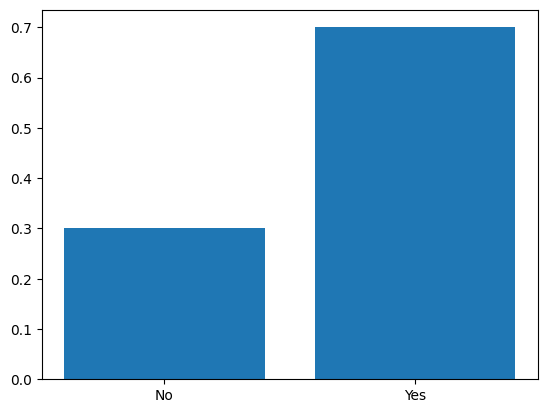

In [ ]:
# vamos verificar o balanceamento de classes
plt.bar(x=data['creditability'].value_counts(normalize=True).index,
        height=data['creditability'].value_counts(normalize=True).values)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

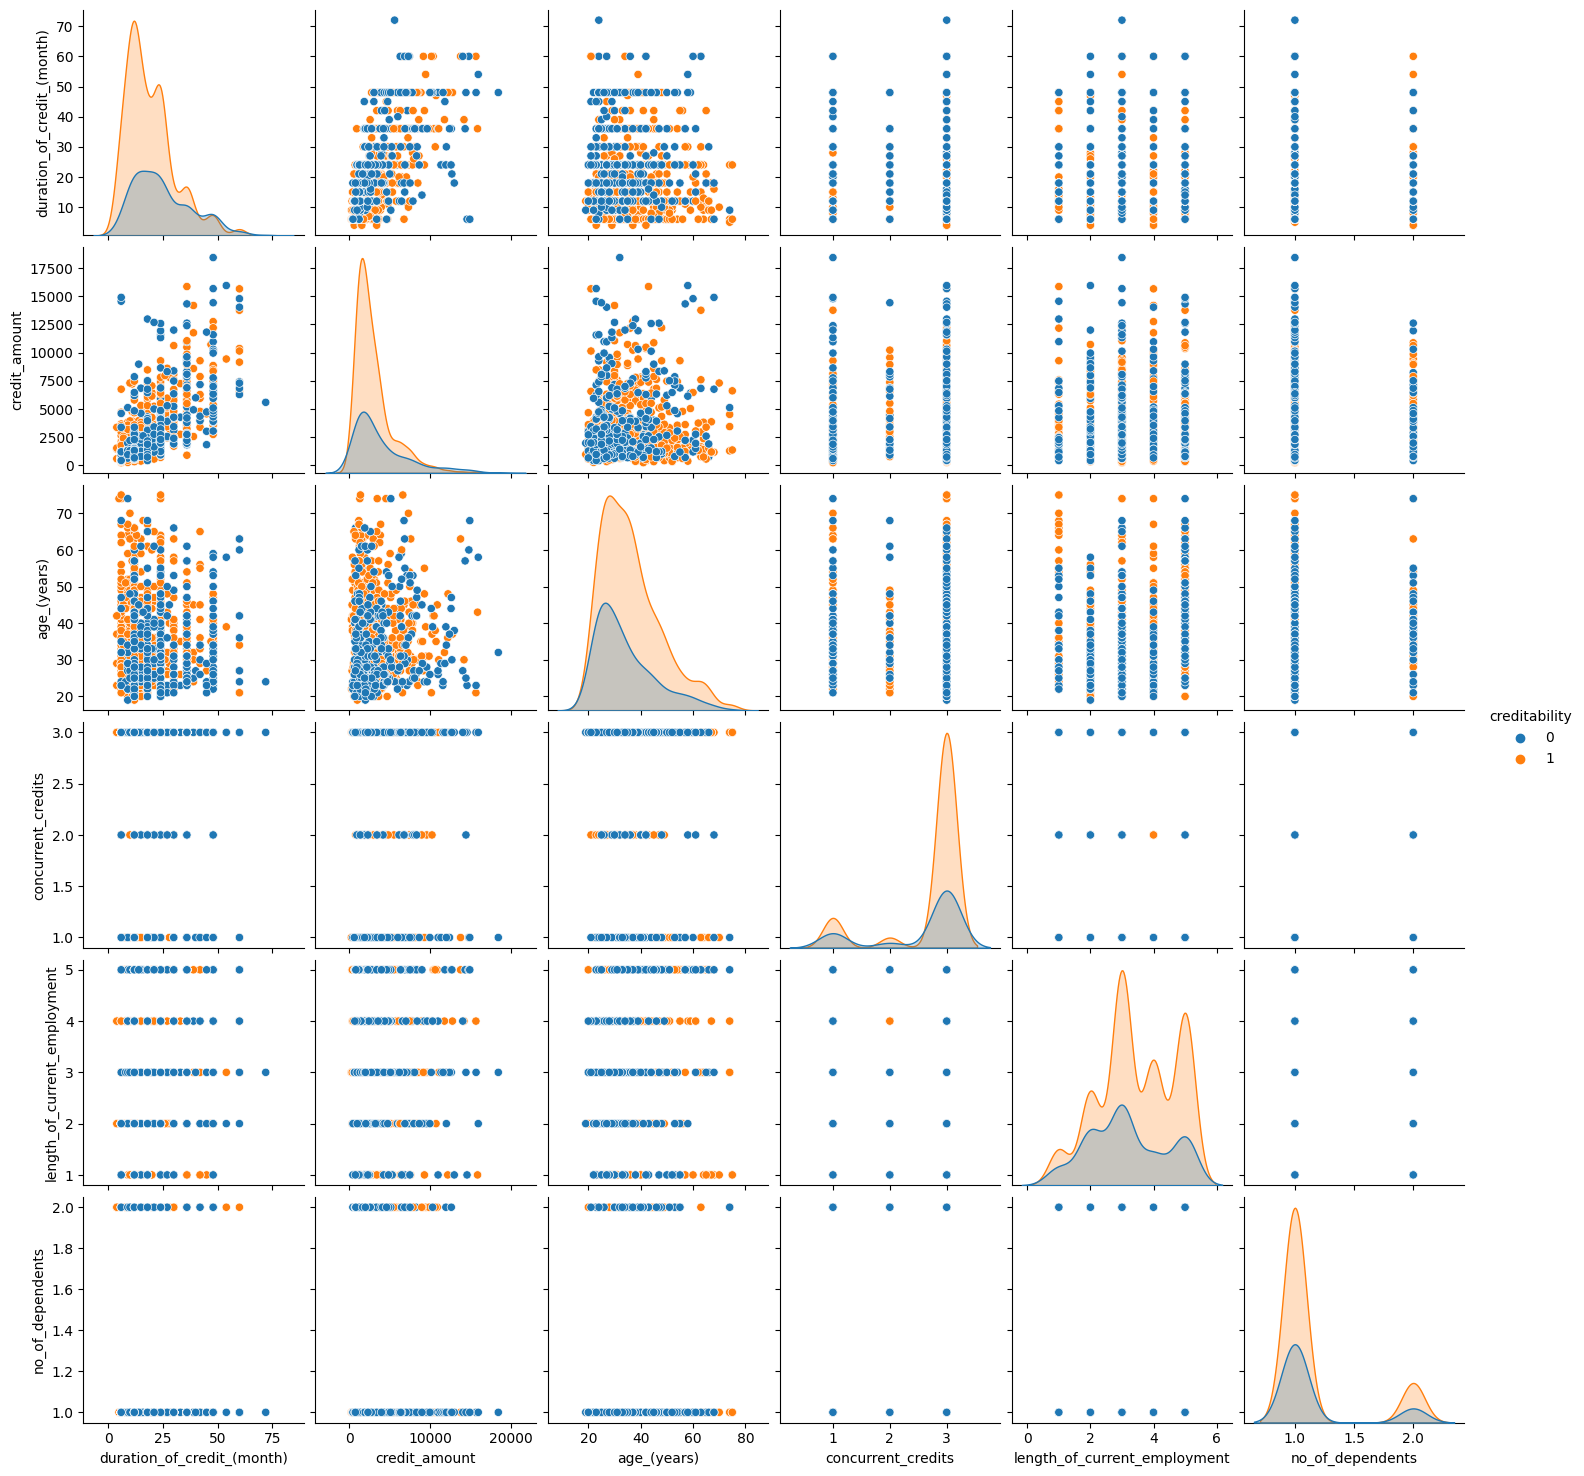

In [ ]:
# façamos uma análise visual da distribuição de cada variável em relação às classes
sns.pairplot(data, hue='creditability')

Aparentemente, nenhum das combinações 2 x 2 apresenta separabilidade linear. Mas não percamos as esperanças. Um conjunto de dados pode ser linearmente separável em *dimensões maiores*.

No entanto, nossa cognição é limita a enxergar em 3 dimensões.

Mesmo assim, vamos partir para as etapas de modelagem. Mas primeiro, precisamos separar uma parte da base de dados para ser utilizada como teste. Por quê?

In [ ]:
# separando x e y
x = data.drop(['creditability'], axis=1)
y = data[['creditability']]

In [ ]:
# separando treino e teste - sem estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# analisando proporções
props = pd.DataFrame(y.value_counts(normalize=True), columns=['Original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,Original,train,test
creditability,,,
1,0.7,0.685714,0.733333
0,0.3,0.314286,0.266667


In [ ]:
# separando treino e teste - com estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# analisando proporções - novamente
props = pd.DataFrame(y.value_counts(normalize=True), columns=['Original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,Original,train,test
creditability,,,
1,0.7,0.7,0.7
0,0.3,0.3,0.3


Agora nossas amostras de treinamento e teste são representativas e podemos prosseguir com nossa análise.

Sempre que formos construir um modelos, precisamos estabelecer uma referência, ou seja, precisamos ter uma base para comparação dos desempenhos. Isso é conhecido como comparação *baseline*.

No nosso estudo, nosso baseline será um modelo totalmente enviesado que prevê que todos os clientes, independente de suas características, terão credibilidade.

In [ ]:
# previsões enviesadas (todos os valores = 1)
y_base = np.repeat(1, repeats=y_test.shape[0])

In [ ]:
# vamos analise métricas do modelo baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       210

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



In [ ]:
# vejamos se nosso modelo de regressão logística melhora
rl = LogisticRegression(penalty=None).fit(x_train, y_train)

# realizando novas previsões
yhat_rl1 = rl.predict(x_test)

# analisando as métricas
print(classification_report(y_test, yhat_rl1))

              precision    recall  f1-score   support

           0       0.54      0.16      0.24        90
           1       0.72      0.94      0.82       210

    accuracy                           0.71       300
   macro avg       0.63      0.55      0.53       300
weighted avg       0.67      0.71      0.65       300



Por ser um modelo baseado em combinações lineares, o modelo de regressão logística é facilmente *enviesado* pelas amplitudes de variação dos atributos de entrada. Atributos com amplitudes muito diferentes podem enviesar os coeficientes do modelo e torná-lo instável.

Vamos conhecer uma técnica interessante para manter passos de pré-processamento unidos num único objeto.

In [ ]:
# criando um pipeline de modelagem
pipe_rl = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('rl2', LogisticRegression(penalty=None))
])

# ajustando o pipeline
pipe_rl.fit(x_train, y_train)

# realizando novas previões
yhat_rl2 = pipe_rl.predict(x_test)

# analisando as métricas
print(classification_report(y_test, yhat_rl2))

              precision    recall  f1-score   support

           0       0.56      0.16      0.24        90
           1       0.72      0.95      0.82       210

    accuracy                           0.71       300
   macro avg       0.64      0.55      0.53       300
weighted avg       0.67      0.71      0.65       300



Também podemos incorporar conhecimentos específicos do negócio para avaliar nossos modelos. Vamos supor as seguintes situações:

- **Cliente credível previsto como credível (TP)**: + 50.00
- **Cliente credível previsto como não credível (FN)**: -5.00
- **Cliente não credível previsto como não credível (TN)**: - 5.00
- **Cliente não credível previsto como credível (FP)**: - 150.00

In [ ]:
def customer_cost(yreal, ypred):

  # calcula a matriz de confusão
  conf_matrix = confusion_matrix(yreal, ypred)

  # extrai pontuações
  TP = conf_matrix[1, 1]  # Verdadeiros positivos
  FP = conf_matrix[0, 1]  # Falsos positivos
  TN = conf_matrix[0, 0]  # Verdadeiros negativos
  FN = conf_matrix[1, 0]  # Falsos negativos

  # calcula custo
  return ((50 * TP) + (-5 * FN) + (-5 * TN) + (-150 * FP)) / yreal.shape[0]


In [ ]:
print(f'Custo Médio associado ao baseline: {customer_cost(y_test, y_base)}')
print(f'Custo Médio associado ao Reg. Log. 1: {customer_cost(y_test, yhat_rl1)}')
print(f'Custo Médio associado ao Reg. Log. 2: {customer_cost(y_test, yhat_rl2)}')

Custo Médio associado ao baseline: -10.0
Custo Médio associado ao Reg. Log. 1: -5.433333333333334
Custo Médio associado ao Reg. Log. 2: -5.25


Finalmente, supondo que escolhemos o último modelo como nosso modelo final, podemos usá-lo para explicar decisões de negócio para pessoas não técnicas. Façamos uma análise de importância de atributos.

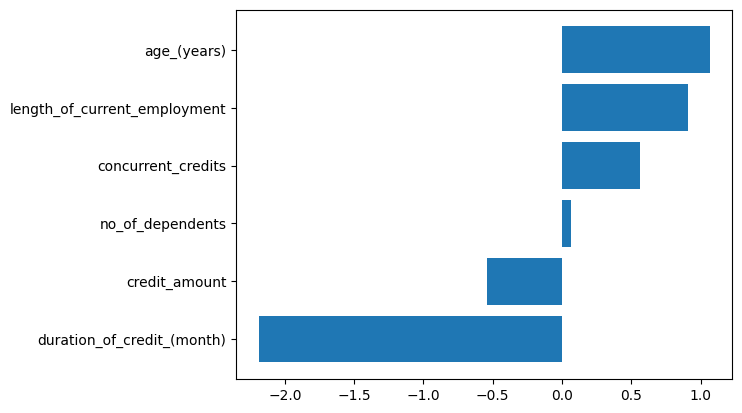

In [ ]:
# criando conjunto de dados de importâncias de atributos
imp = pd.DataFrame(x_train.columns, columns=['atributos'])
imp['importancia'] = pipe_rl['rl2'].coef_[0]
imp.sort_values(by=['importancia'], inplace=True)

# construindo gráfico
plt.barh(y=imp['atributos'], width=imp['importancia'])
plt.show()